
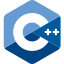
<br>

<div style="text-align:center; font-size:200%;">
 <b>Expected</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 02 Expected.ipynb -->
<!-- slides/module_180_error_handling/topic_310_expected.cpp -->


## Implementierungen

- Standard (C++23):
[`std::expected`](https://en.cppreference.com/w/cpp/utility/expected)
- TartanLlama: [`tl.expected`](https://github.com/TartanLlama/expected)
- ETL: [`etl::expected`](https://www.etlcpp.com/expected.html)


- `std::expected<T, E>` ist ein Typ, der entweder ein Objekt vom Typ `T` oder
  ein Objekt vom Typ `E` enthält.
- `T` repräsentiert den Erfolgsfall
- `E` repräsentiert den Fehlerfall
- `bool(ex)` oder `ex.has_value()`: Wahr im Erfolgsfall
- `*ex` oder `ex.value()`: Zugriff auf den Wert
- `ex.error()`: Zugriff auf den Fehler

In [ ]:
#include "expected.hpp"
#include <cstddef>
#include <iomanip>
#include <iostream>
#include <string>

In [ ]:
enum class Error
{
    camera_not_available,
    lidar_not_available,
}

In [ ]:
std::string
error_string(Error error)
{
    switch (error)
    {
    case Error::camera_not_available:
        return "Camera not available!";
    case Error::lidar_not_available:
        return "Lidar not available!";
    default:
        return "Unexpected error!";
    }
}

In [ ]:
constexpr std::byte camera_bit{0b0001};
constexpr std::byte lidar_bit{0b0010};

In [ ]:
int to_int(std::byte byte) { return static_cast<int>(byte); }

In [ ]:
tl::expected<std::byte, Error> initialize_camera(bool success)
{
    std::cout << "Initializing camera..." << std::endl;
    if (success)
    {
        return camera_bit;
    }
    else
    {
        return tl::unexpected(Error::camera_not_available);
    }
}

In [ ]:
tl::expected<std::byte, Error> initialize_lidar(bool success)
{
    std::cout << "Initializing lidar..." << std::endl;
    if (success)
    {
        return lidar_bit;
    }
    else
    {
        return tl::unexpected(Error::lidar_not_available);
    }
}

In [ ]:
tl::expected<std::byte, Error> initialize_sensors(
    bool camera_success = true, bool lidar_success = true
)
{
    std::cout << "Initializing sensors..." << std::endl;

    auto camera = initialize_camera(camera_success);
    if (!camera.has_value())
    {
        return tl::unexpected<Error>{camera.error()};
    }

    auto lidar = initialize_lidar(lidar_success);
    if (!lidar)
    {
        return lidar;
    }

    return *camera | *lidar;
}

In [ ]:
auto result = initialize_sensors();

In [ ]:
std::cout << std::boolalpha << result.has_value();

In [ ]:
std::cout << to_int(result.value());

In [ ]:
std::cout << to_int(*result);

In [ ]:
result = initialize_sensors(false);

In [ ]:
std::cout << result.has_value();

In [ ]:
std::cout << error_string(result.error());

In [ ]:
result = initialize_sensors(true, false);

In [ ]:
std::cout << result.has_value();

In [ ]:
std::cout << error_string(result.error());


### Monadische Fehlerbehandlung

- Es gibt Methoden, die die Fehlerbehandlung vereinfachen.
- `and_then()` erlaubt es, eine Funktion aufzurufen, wenn der Erfolgsfall
  eintritt.
  - Diese Funktion bekommt den Wert übergeben.
- `or_else()` erlaubt es, eine Funktion aufzurufen, wenn der Fehlerfall
  eintritt.
- Man nennt diese Funktionen `monadische Operationen`.

In [ ]:
tl::expected<std::byte, Error> initialize_sensors_monadic(
    bool camera_success = true, bool lidar_success = true
)
{
    std::cout << "Initializing sensors (monadic)..." << std::endl;

    return initialize_camera(camera_success)
        .and_then([lidar_success](std::byte camera_bit) {
            return initialize_lidar(lidar_success)
                .and_then(
                    [camera_bit](std::byte lidar_bit
                    ) -> tl::expected<std::byte, Error> {
                        return camera_bit | lidar_bit;
                    }
                );
        });
}

In [ ]:
result = initialize_sensors_monadic();

In [ ]:
std::cout << std::boolalpha << result.has_value();

In [ ]:
std::cout << to_int(result.value());

In [ ]:
std::cout << to_int(*result);

In [ ]:
result = initialize_sensors(false);

In [ ]:
std::cout << result.has_value();

In [ ]:
std::cout << error_string(result.error());

In [ ]:
result = initialize_sensors(true, false);

In [ ]:
std::cout << result.has_value();

In [ ]:
std::cout << error_string(result.error());


### Code Beispiele

- STL
  - Target: `expected`
  - Dateien: `code/completed/error_handling/expected*`
- ETL
  - Target: `etl_expected`
  - Dateien: `code/completed/etl_examples/etl_expected*`


## Workshop: Kontrolle eines Motors

In diesem Workshop implementieren Sie ein einfaches Motorsteuerungssystem
unter Verwendung von `std::expected` zur Behandlung potenzieller Fehler.

Das System wird eine Klasse `Motor` mit den folgenden Memberfunktionen
enthalten:

- `start_motor()`,
- `set_speed()` und
- `stop_motor()`.

Jede Memberfunktion sollte in der Lage sein, Fehler mit aussagekräftigen
Fehlermeldungen zu melden.


- Definieren Sie Fehlerarten: Erstellen Sie eine Enum-Klasse `MotorError`,
  die mögliche Fehler für jede Funktion auflistet.
- Implementieren Sie die Klasse `Motor` mit den folgenden Attributen:
  - `double fuel_level`: Der Kraftstoffstand des Motors.
  - `double current_speed`: Die aktuelle Geschwindigkeit des Motors.
- Implementieren Sie die folgenden Memberfunktionen:
  - `start_motor()`: Simuliert das Starten des Motors.
    - Soll `tl::expected<double, MotorError>` zurückgeben
    - Im Erfolgsfall ist der Rückgabewert die Motorgeschwindigkeit
    - Mögliche Fehler sind `no_fuel`, `motor_already_running`.
  - `set_speed(double speed)`: Simuliert das Einstellen der
    Motorgeschwindigkeit.
    - Soll `tl::expected<void, Error>` zurückgeben
    - Erlaubte Geschwindigkeiten liegen zwischen 10,0 und 100,0.
    - Mögliche Fehler sind `speed_too_low`, `speed_too_high`,
      `motor_not_running`.
  - `stop_motor()`: Simuliert das Stoppen des Motors.
    - Soll `tl::expected<void, Error>` zurückgeben
    - Der einzige mögliche Fehler ist `motor_not_running`.
- Testen Sie jede Ihrer Motorsteuerungsfunktionen.

In [ ]:
#include <iostream>
#include "expected.hpp"

In [ ]:
enum class MotorError
{
    no_fuel,
    motor_already_running,
    motor_not_running,
    speed_too_low,
    speed_too_high
};

In [ ]:
class Motor
{
public:
    Motor(double fuel_level) : fuel_level{fuel_level}, current_speed{0.0} {}

    tl::expected<double, MotorError> start_motor()
    {
        std::cout << "Trying to start motor..." << std::endl;
        if (fuel_level <= 0)
        {
            return tl::unexpected(MotorError::no_fuel);
        }
        if (is_running())
        {
            return tl::unexpected(MotorError::motor_already_running);
        }
        current_speed = 50.0;
        return current_speed;
    }

    tl::expected<void, MotorError> set_speed(double speed)
    {
        std::cout << "Trying to set motor speed to " << speed << "..." << std::endl;
        if (!is_running())
        {
            return tl::unexpected(MotorError::motor_not_running);
        }
        if (speed < 10.0)
        {
            return tl::unexpected(MotorError::speed_too_low);
        }
        if (speed > 100.0)
        {
            return tl::unexpected(MotorError::speed_too_high);
        }
        current_speed = speed;
        return {};
    }

    tl::expected<void, MotorError> stop_motor()
    {
        std::cout << "Stopping motor..." << std::endl;
        if (!is_running())
        {
            return tl::unexpected(MotorError::motor_not_running);
        }
        current_speed = 0.0;
        return {};
    }

    bool is_running() const { return current_speed > 0.0; }

    double get_fuel_level() const { return fuel_level; }

    double get_current_speed() const { return current_speed; }

private:
    double fuel_level;
    double current_speed;
};

In [ ]:
Motor motor{10.0}; // Initialize motor with 10 units of fuel

In [ ]:
auto start_result{motor.start_motor()};

In [ ]:
if (!start_result.has_value())
{
    std::cerr << "Unexpected error starting motor: "
              << static_cast<int>(start_result.error()) << std::endl;
}
else
{
    std::cout << "Motor started successfully at speed: " << start_result.value()
              << std::endl;
}

In [ ]:
auto speed_result{motor.set_speed(80.0)};

In [ ]:
if (!speed_result)
{
    std::cerr << "Unexpected error setting speed: "
              << static_cast<int>(speed_result.error()) << std::endl;
}
else
{
    std::cout << "Speed set successfully." << std::endl;
}

In [ ]:
speed_result = motor.set_speed(5.0);

In [ ]:
if (!speed_result)
{
    std::cerr << "Expected Error setting speed: "
              << static_cast<int>(speed_result.error()) << std::endl;
}
else
{
    std::cout << "Speed set to invalid value." << std::endl;
}

In [ ]:
speed_result = motor.set_speed(150.0);

In [ ]:
if (!speed_result)
{
    std::cerr << "Expected Error setting speed: "
              << static_cast<int>(speed_result.error()) << std::endl;
}
else
{
    std::cout << "Speed set to invalid value." << std::endl;
}

In [ ]:
auto stop_result{motor.stop_motor()};

In [ ]:
if (!stop_result)
{
    std::cerr << "Unexpected error stopping motor: " << static_cast<int>(stop_result.error())
              << std::endl;
}
else
{
    std::cout << "Motor stopped successfully." << std::endl;
}

In [ ]:
// Test start_motor with motor already running
motor.start_motor();
start_result = motor.start_motor();

In [ ]:
if (!start_result)
{
    std::cerr << "Expected error starting motor: " << static_cast<int>(start_result.error())
              << std::endl;
}

In [ ]:
// Test stop_motor with motor not running
motor.stop_motor();
stop_result = motor.stop_motor();

In [ ]:
if (!stop_result)
{
    std::cerr << "Expected error stopping motor: " << static_cast<int>(stop_result.error())
              << std::endl;
}